In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns
import ipynbname

# Set up
sub = 'RC'
save_fig = True

# Manage path
cur_dir = os.getcwd()
project_dir = os.path.dirname(os.path.dirname(cur_dir))
out_dir = os.path.join(cur_dir, 's1_plot_loc')
data_dir = os.path.join(project_dir, 'data', 'uniLoc')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [36]:
# Define a function to format the elements
def format_element(x):
    return float(f"{x[0][0]:.5f}")

In [37]:
# Clean
all_ses = ['A', 'V']

loc = []
estMu = []
sdMu = []
conf = []

# Define a function to format the elements
def format_element(x):
    return float(f"{x[0][0]:.5f}")

for s in all_ses:
    data = loadmat(os.path.join(data_dir, f'uniLoc_sub-{sub}_ses-{s}.mat'))  # Use loadmat to load .mat file
    ExpInfo = np.squeeze(data["ExpInfo"])
    sortedResp = np.squeeze(data['sortedResp'])

    nRep = int(ExpInfo['nRep'].squeeze())
    nLevel = int(ExpInfo['nLevel'].squeeze())

    # Localization data
    loc_rep = np.array(np.reshape(np.vectorize(format_element)(sortedResp['target_cm']), (nLevel, nRep)))
    loc.append(loc_rep[:, 0]) # Only take the first repetition because locations are the same for all
    est = np.array(np.reshape(np.vectorize(format_element)(sortedResp['response_cm']), (nLevel, nRep)))

    estMu.append(np.mean(est, axis=1))
    sdMu.append(np.std(est.astype(float), axis=1))  

    # Confidence data
    temp_conf = np.array(np.reshape(np.vectorize(format_element)(sortedResp['conf_radius_cm']), (nLevel, nRep)))
    conf.append(temp_conf)

loc = np.round(loc, 3)
estMu = np.round(estMu, 3)
sdMu = np.round(sdMu, 3)
conf = np.round(conf, 3)


/var/folders/xw/h0rz2bs964n1krlhp49pyg6r0004nm/T/ipykernel_45846/719100464.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nRep = int(ExpInfo['nRep'].squeeze())
/var/folders/xw/h0rz2bs964n1krlhp49pyg6r0004nm/T/ipykernel_45846/719100464.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nLevel = int(ExpInfo['nLevel'].squeeze())


## Line plot of localization responses

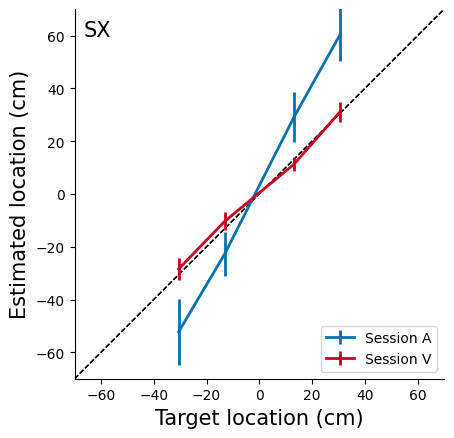

In [43]:
# Plot
lw = 2
fontSZ = 15
titleSZ = 20
clt = np.array([[5, 113, 176], [202, 0, 32]]) / 255  # red and blue

plt.figure()
limax = 70

for i, s in enumerate(all_ses):
    plt.plot([-limax, limax], [-limax, limax], 'k--', linewidth=lw/2)
    e = plt.errorbar(loc[i], estMu[i], yerr=sdMu[i], color=clt[i], linewidth=lw, label=f'Session {s}')
    e[0].set_color(clt[i]) 

plt.xlim([-limax, limax])
plt.ylim([-limax, limax])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Target location (cm)', fontsize=fontSZ)
plt.ylabel('Estimated location (cm)', fontsize=fontSZ)

# Add legend
plt.legend()

# Remove the upper and right axis
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add the subject identifier at the right top corner
plt.text(0.1, 0.97, sub, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=fontSZ)

if save_fig:
    fig_path = os.path.join(out_dir, f'{sub}_uni_loc.png')
    plt.savefig(fig_path, bbox_inches='tight')

plt.show()

## Violin plot of the confidence judgements

/var/folders/xw/h0rz2bs964n1krlhp49pyg6r0004nm/T/ipykernel_45846/2717459919.py:9: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=[c.flatten() for c in conf_s], inner=None, linewidth=1, palette=[clt[idx]], ax=axes[idx])
/var/folders/xw/h0rz2bs964n1krlhp49pyg6r0004nm/T/ipykernel_45846/2717459919.py:9: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=[c.flatten() for c in conf_s], inner=None, linewidth=1, palette=[clt[idx]], ax=axes[idx])


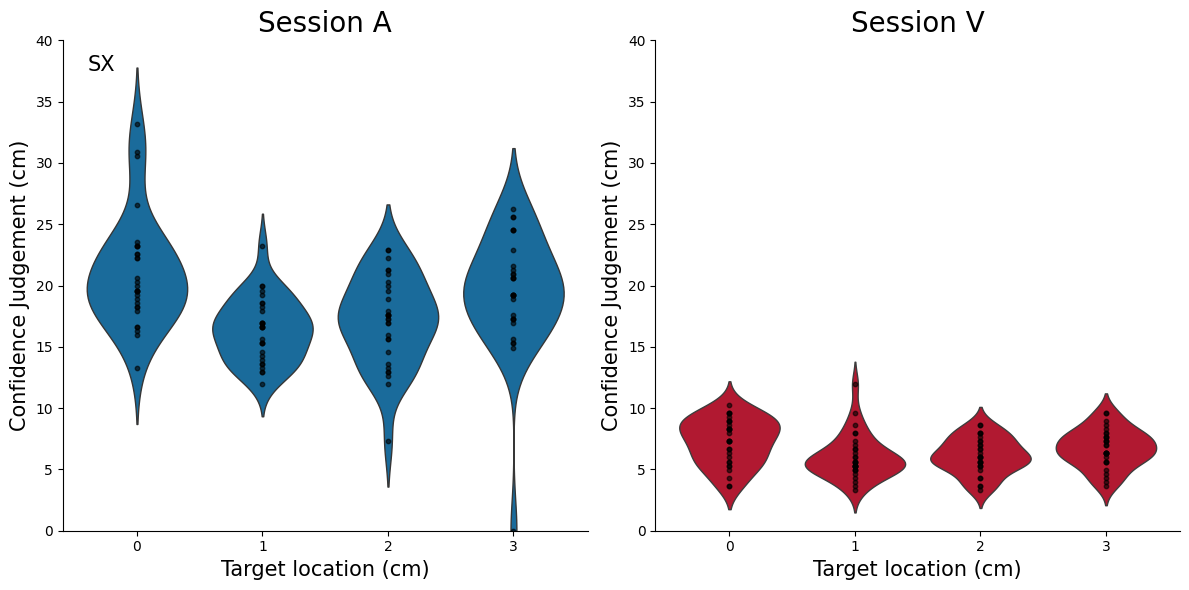

In [42]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 subplot

for idx, s in enumerate(all_ses):
    session_index = all_ses.index(s)
    conf_s = conf[idx]

    sns.violinplot(data=[c.flatten() for c in conf_s], inner=None, linewidth=1, palette=[clt[idx]], ax=axes[idx])

    # Overlay raw data points
    for i, c in enumerate(conf_s):
        axes[idx].scatter([i] * len(c.flatten()), c.flatten(), color='black', s=10, alpha=0.6)


    # Use loc[0] for session 's' as x-axis labels
    axes[idx].set_xticks(range(len(loc[0])))
    axes[idx].set_ylim([0, 40])
    axes[idx].set_xlabel('Target location (cm)', fontsize=fontSZ)
    axes[idx].set_ylabel('Confidence Judgement (cm)', fontsize=fontSZ)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].set_title('Auditory', fontsize=titleSZ)
    axes[idx].set_title(f'Session {s}', fontsize=titleSZ)
    if idx == 0:
        axes[idx].text(0.1, 0.97, sub, horizontalalignment='right', verticalalignment='top', transform=axes[idx].transAxes, fontsize=fontSZ)


plt.tight_layout()
if save_fig:
    fig_path = os.path.join(out_dir, f'{sub}_uni_conf.png')
    plt.savefig(fig_path, bbox_inches='tight')

plt.show()